In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INDOOR LOCALIZATION EXPERIMENTS/data_new.csv')

In [ ]:
data.head()

,00:02:6f:af:6c:11,00:1a:2a:e8:be:35,00:30:4f:9c:79:18,00:30:f1:fe:fa:7b,00:e0:4b:c8:0c:1e,02:17:c8:83:04:1a,02:2e:ce:7b:26:7b,04:bd:88:80:7e:40,04:bd:88:83:b8:a0,04:bd:88:83:c4:e0,...,dc:ee:06:3a:ac:64,f2:d5:55:a6:2d:2b,f6:39:09:58:13:a9,f8:23:b2:b7:2a:3a,fe:01:7c:78:d3:d9,TIMESTAMPS,LAT,LON,ROOM,FLOOR
0,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
1,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
2,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
3,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2
4,-96.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0,0,1.676569e+18,36.896472,30.648824,1e1b47d4-27c4-42c5-add2-e6ff16348b65,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data.replace(0, -1000, inplace=True)

In [ ]:
X = data.iloc[:,:85]

In [ ]:
y = data.iloc[:,88]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
import random

In [ ]:
random.seed(2)

In [ ]:
from joblib import Parallel, delayed

In [ ]:
# Define a map from integer values to distance metrics
distance_metric_map = {
    0: "euclidean",
    1: "manhattan",
    2: "chebyshev"
}

# Define a map from integer values to weighting methods
weighting_method_map = {
    0: "uniform",
    1: "distance"
}

algorithm_map = {
    0: "brute",
    1: "kd_tree",
    2: "auto",
    3: "ball_tree"
}


# Define the hyperparameter space for the KNN algorithm
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
distance_metric_values = [0, 1, 2]
weighting_method_values = [0, 1]
algorithm_values = [0, 1, 2, 3]
leaf_size_values = [10, 20, 30, 40, 50]
p_values = [1, 2, 3, 4, 5]

In [ ]:
knn_accuracy_list_woa = []
knn_precision_list_woa = []
knn_recall_list_woa = []

In [ ]:
import tensorflow as tf

In [ ]:
with tf.device("/gpu:0"):

# Define a function to evaluate the fitness of a set of hyperparameters
  def evaluate_fitness(hyperparameters):
    k = hyperparameters[0]
    distance_metric = round(hyperparameters[1])
    weighting_method = round(hyperparameters[2])
    algorithm = round(hyperparameters[3])
    leaf = hyperparameters[4]

    # Train the KNN algorithm using the hyperparameters
    knn = KNeighborsClassifier(n_neighbors=int(k), metric=distance_metric_map[distance_metric],
                               weights=weighting_method_map[weighting_method],
                               algorithm=algorithm_map[algorithm],
                               leaf_size = int(leaf))
    knn.fit(X_train, y_train)
    # Calculate the accuracy of the model on the testing set
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

  # Initialize the population of whales
  num_whales = 50
  population = []
  num_jobs = -1

  for i in range(num_whales):
    hyperparameters = [np.random.choice(k_values), np.random.choice(distance_metric_values),
                       np.random.choice(weighting_method_values),
                       np.random.choice(algorithm_values),
                       np.random.choice(leaf_size_values)]
    population.append(hyperparameters)

  # Set the number of iterations for the WOA algorithm
  num_iterations = 100

  # Iterate through the WOA algorithm loop
  # for i in range(num_iterations):
  #   # Evaluate the fitness of each whale
  #   fitness = []
  #   for whale in population:
  #     fitness.append(evaluate_fitness(whale))

  for i in range(num_iterations):
    # Evaluate the fitness of each particle
    fitness = Parallel(n_jobs=num_jobs)(
        delayed(evaluate_fitness)(whale) for whale in population
    )

    # Update the position of each whale
    a = 2 - i*(2/num_iterations) # Update the a parameter for the update formula
    for j, whale in enumerate(population):
      r1 = np.random.uniform(0, 1)
      r2 = np.random.uniform(0, 1)
      A = 2*a*r1 - a
      C = 2*r2
      l = (a*C) - abs(A)
      p = l if l > 0 else 0
      D_k = abs(C*whale[0] - population[j][0])
      D_metric = abs(C*whale[1] - population[j][1])
      D_weighting = abs(C*whale[2]-population[j][2])
      D_algorithm = abs(C*whale[3]-population[j][3])
      D_leaf = abs(C*whale[4]-population[j][4])

      X1 = population[j][0] - A*D_k
      X2 = population[j][1] - A*D_metric
      X3 = population[j][2] - A*D_weighting
      X4 = population[j][3] - A*D_algorithm
      X5 = population[j][4] - A*D_leaf

      v_k = X1
      v_metric = X2
      v_weighting = X3
      v_algorithm = X4
      v_leaf = X5

    # Check if the new position is within the bounds of the hyperparameter space
      if X1 < k_values[0]:
        X1 = k_values[0]
      elif X1 > k_values[-1]:
        X1 = k_values[-1]

      if X2 < distance_metric_values[0]:
        X2 = distance_metric_values[0]
      elif X2 > distance_metric_values[-1]:
        X2 = distance_metric_values[-1]

      if X3 < weighting_method_values[0]:
        X3 = weighting_method_values[0]
      elif X3 > weighting_method_values[-1]:
        X3 = weighting_method_values[-1]

      if X4 < algorithm_values[0]:
        X4 = algorithm_values[0]
      elif X4 > algorithm_values[-1]:
        X4 = algorithm_values[-1]

      if X5 < leaf_size_values[0]:
        X5 = leaf_size_values[0]
      elif X5 > leaf_size_values[-1]:
        X5 = leaf_size_values[-1]


      whale[0] = X1
      whale[1] = X2
      whale[2] = X3
      whale[3] = X4
      whale[4] = X5

    # Update the leader whale
    leader_index = fitness.index(max(fitness))
    leader = population[leader_index]
  # Return the hyperparameters of the leader whale as the optimal set of hyperparameters for the KNN algorithm
  optimal_hyperparameters = leader
  optimal_metric = distance_metric_map[round(optimal_hyperparameters[1])]
  optimal_weights = weighting_method_map[optimal_hyperparameters[2]]
  optimal_algorithm = algorithm_map[optimal_hyperparameters[3]]

  for _ in range(0, 50):

      feature_indexes = random.sample(range(0,85), 10)
      X = data.iloc[:,feature_indexes]
      y = data.iloc[:,88]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  # Train the KNN algorithm using the optimal hyperparameters
      knn = KNeighborsClassifier(n_neighbors=int(optimal_hyperparameters[0]),
                             metric=optimal_metric,
                             weights=optimal_weights,
                             algorithm=optimal_algorithm,
                             leaf_size = int(optimal_hyperparameters[4]))
      knn.fit(X_train, y_train)

  # Calculate the accuracy of the model on the testing set
      y_pred = knn.predict(X_test)
      knn_accuracy_woa = accuracy_score(y_test, y_pred)
      knn_accuracy_list_woa.append(knn_accuracy_woa)
      knn_precision_woa = precision_score(y_test,y_pred,average='weighted')
      knn_precision_list_woa.append(knn_precision_woa)
      knn_recall_woa = recall_score(y_test,y_pred, average='weighted')
      knn_recall_list_woa.append(knn_recall_woa)
  print(f"Optimal hyperparameters: k={optimal_hyperparameters[0]}, distance metric={optimal_metric}, weighting method={optimal_weights}, algorithm={optimal_algorithm}, leaf_size={optimal_hyperparameters[4]}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Optimal hyperparameters: k=1.7056134775809189, distance metric=euclidean, weighting method=uniform, algorithm=brute, leaf_size=17.056134775809188


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn_accuracy_mean_woa = np.mean(knn_accuracy_list_woa)
knn_accuracy_std_woa = np.std(knn_accuracy_list_woa)
knn_accuracy_max_woa = np.max(knn_accuracy_list_woa)
knn_accuracy_min_woa = np.min(knn_accuracy_list_woa)

knn_precision_mean_woa = np.mean(knn_precision_list_woa)
knn_precision_std_woa = np.std(knn_precision_list_woa)
knn_precision_max_woa = np.max(knn_precision_list_woa)
knn_precision_min_woa = np.min(knn_precision_list_woa)

knn_recall_mean_woa = np.mean(knn_recall_list_woa)
knn_recall_std_woa = np.std(knn_recall_list_woa)
knn_recall_max_woa = np.max(knn_recall_list_woa)
knn_recall_min_woa = np.min(knn_recall_list_woa)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(knn_accuracy_mean_woa)
print(knn_precision_mean_woa)
print(knn_recall_mean_woa)

0.8776276771004943
0.8650262220874048
0.8776276771004943


In [ ]:
print(knn_accuracy_max_woa)
print(knn_accuracy_min_woa)
print(knn_accuracy_std_woa)

0.9950576606260296
0.6672158154859967
0.08390795285893633


In [ ]:
print(knn_precision_max_woa)
print(knn_precision_min_woa)
print(knn_precision_std_woa)

0.9951235584843492
0.6068531201607497
0.09689935515553581


In [ ]:
print(knn_recall_max_woa)
print(knn_recall_min_woa)
print(knn_recall_std_woa)

0.9950576606260296
0.6672158154859967
0.08390795285893633


RANDOM FOREST

In [ ]:
randfrst_accuracy_list_woa = []
randfrst_precision_list_woa = []
randfrst_recall_list_woa = []

In [ ]:
# Define a map from integer values to criterion options
criterion_map = {
     0: "gini",
     1: "entropy",
     2: "log_loss"
 }

# # Define a map from integer values to feature importance calculation methods
min_samples_split_map = {
     0: 2,
     1: 5,
     2: 10
 }

max_features_map = {
    0: "sqrt",
    1: "log2"
}

# # Define the hyperparameter space for the Random Forest algorithm
n_estimators_values = [10, 50, 100, 200, 500]
max_depth_values = [5, 10, 20]
criterion_values = [0, 1, 2]
min_samples_split_values = [0, 1, 2]
min_samples_leaf_values = [1, 2, 3, 4, 5]
max_features_values = [0, 1]


In [ ]:
with tf.device("/gpu:0"):

# Define a function to evaluate the fitness of a set of hyperparameters
  def evaluate_fitness(hyperparameters):
    n_estim = hyperparameters[0]
    maxdepth = hyperparameters[1]
    criterion_val = round(hyperparameters[2])
    min_ssv = round(hyperparameters[3])
    min_sl = hyperparameters[4]
    max_fv = round(hyperparameters[5])

    # Train the KNN algorithm using the hyperparameters
    rf = RandomForestClassifier(n_estimators=int(n_estim), max_depth=int(maxdepth),
                               criterion=criterion_map[criterion_val],
                               min_samples_split=min_samples_split_map[min_ssv],
                                min_samples_leaf=int(min_sl),
                                max_features=max_features_map[max_fv]
                                )
    rf.fit(X_train, y_train)
    # Calculate the accuracy of the model on the testing set
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

  # Initialize the population of whales
  num_whales = 50
  population = []
  num_jobs = -1
  for i in range(num_whales):
    # random.seed(41)
    hyperparameters = [np.random.choice(n_estimators_values), np.random.choice(max_depth_values),
                       np.random.choice(criterion_values),
                       np.random.choice(min_samples_split_values),
                       np.random.choice(min_samples_leaf_values),
                       np.random.choice(max_features_values)
                       ]
    population.append(hyperparameters)

  # Set the number of iterations for the WOA algorithm
  num_iterations = 10

  # Iterate through the WOA algorithm loop
  # for i in range(num_iterations):
  #   # Evaluate the fitness of each whale
  #   fitness = []
  #   for whale in population:
  #     fitness.append(evaluate_fitness(whale))

  for i in range(num_iterations):
    # Evaluate the fitness of each particle
    fitness = Parallel(n_jobs=num_jobs)(
        delayed(evaluate_fitness)(whale) for whale in population
    )

    # Update the position of each whale
    a = 2 - i*(2/num_iterations) # Update the a parameter for the update formula
    for j, whale in enumerate(population):
      r1 = np.random.uniform(0, 1)
      r2 = np.random.uniform(0, 1)
      A = 2*a*r1 - a
      C = 2*r2
      l = (a*C) - abs(A)
      p = l if l > 0 else 0
      D_n = abs(C*whale[0] - population[j][0])
      D_maxdepth = abs(C*whale[1] - population[j][1])
      D_criterion = abs(C*whale[2]-population[j][2])
      D_minssv = abs(C*whale[3]-population[j][3])
      D_minslv = abs(C*whale[4]-population[j][4])
      D_maxfv = abs(C*whale[5]-population[j][5])

      X1 = population[j][0] - A*D_n
      X2 = population[j][1] - A*D_maxdepth
      X3 = population[j][2] - A*D_criterion
      X4 = population[j][3] - A*D_minssv
      X5 = population[j][4] - A*D_minslv
      X6 = population[j][5] - A*D_maxfv

      v_n = X1
      v_maxdepth = X2
      v_criterion = X3
      v_minssv = X4
      v_minslv = X5
      v_maxfv = X6

    # Check if the new position is within the bounds of the hyperparameter space
      if X1 < n_estimators_values[0]:
        X1 = n_estimators_values[0]
      elif X1 > n_estimators_values[-1]:
        X1 = n_estimators_values[-1]

      if X2 < max_depth_values[0]:
        X2 = max_depth_values[0]
      elif X2 > max_depth_values[-1]:
        X2 = max_depth_values[-1]

      if X3 < criterion_values[0]:
        X3 = criterion_values[0]
      elif X3 > criterion_values[-1]:
        X3 = criterion_values[-1]

      if X4 < min_samples_split_values[0]:
        X4 = min_samples_split_values[0]
      elif X4 > min_samples_split_values[-1]:
        X4 = min_samples_split_values[-1]

      if X5 < min_samples_leaf_values[0]:
        X5 = min_samples_leaf_values[0]
      elif X5 > min_samples_leaf_values[-1]:
        X5 = min_samples_leaf_values[-1]

      if X6 < max_features_values[0]:
        X6 = max_features_values[0]
      elif X6 > max_features_values[-1]:
        X6 = max_features_values[-1]


      whale[0] = X1
      whale[1] = X2
      whale[2] = X3
      whale[3] = X4
      whale[4] = X5
      whale[5] = X6

    # Update the leader whale
    leader_index = fitness.index(max(fitness))
    leader = population[leader_index]
  # Return the hyperparameters of the leader whale as the optimal set of hyperparameters for the KNN algorithm
  optimal_hyperparameters = leader
  optimal_criterion = criterion_map[round(optimal_hyperparameters[2])]
  optimal_minsamplesplit = min_samples_split_map[round(optimal_hyperparameters[3])]
  optimal_maxfeatures = max_features_map[round(optimal_hyperparameters[5])]

  for _ in range(0, 50):

    # random.seed(41)

    feature_indexes = random.sample(range(0,85), 10)
    X = data.iloc[:,feature_indexes]
    y = data.iloc[:,88]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    rf = RandomForestClassifier(n_estimators=int(optimal_hyperparameters[0]),
                                max_depth = int(optimal_hyperparameters[1]),
                                criterion=optimal_criterion,
                                min_samples_split=optimal_minsamplesplit,
                                min_samples_leaf=int(optimal_hyperparameters[4]),
                                max_features=optimal_maxfeatures)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred)
    randfrst_accuracy_list_woa.append(rf_accuracy)
    rf_precision = precision_score(y_test,y_pred,average='weighted')
    randfrst_precision_list_woa.append(rf_precision)
    rf_recall = recall_score(y_test,y_pred, average='weighted')
    randfrst_recall_list_woa.append(rf_recall)
  print(f"Optimal hyperparameters: n={optimal_hyperparameters[0]}, max_depth={optimal_hyperparameters[1]}, criterion={optimal_criterion}, min_samples_split={optimal_minsamplesplit}, min_samples_leaf={optimal_hyperparameters[4]}, max_features={optimal_maxfeatures}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Optimal hyperparameters: n=62.93543262531424, max_depth=14.220992830077035, criterion=entropy, min_samples_split=5, min_samples_leaf=2.844198566015407, max_features=log2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
randfrst_accuracy_mean_woa = np.mean(randfrst_accuracy_list_woa)
randfrst_accuracy_std_woa = np.std(randfrst_accuracy_list_woa)
randfrst_accuracy_max_woa = np.max(randfrst_accuracy_list_woa)
randfrst_accuracy_min_woa = np.min(randfrst_accuracy_list_woa)

randfrst_precision_mean_woa = np.mean(randfrst_precision_list_woa)
randfrst_precision_std_woa = np.std(randfrst_precision_list_woa)
randfrst_precision_max_woa = np.max(randfrst_precision_list_woa)
randfrst_precision_min_woa = np.min(randfrst_precision_list_woa)

randfrst_recall_mean_woa = np.mean(randfrst_recall_list_woa)
randfrst_recall_std_woa = np.std(randfrst_recall_list_woa)
randfrst_recall_max_woa = np.max(randfrst_recall_list_woa)
randfrst_recall_min_woa = np.min(randfrst_recall_list_woa)

In [ ]:
print(randfrst_accuracy_mean_woa)
print(randfrst_precision_mean_woa)
print(randfrst_recall_mean_woa)

0.9032289950576606
0.8898127660799612
0.9032289950576606


In [ ]:
print(randfrst_accuracy_max_woa)
print(randfrst_accuracy_min_woa)
print(randfrst_accuracy_std_woa)

0.9934102141680395
0.7034596375617792
0.07401477331575557


In [ ]:
print(randfrst_precision_max_woa)
print(randfrst_precision_min_woa)
print(randfrst_precision_std_woa)

0.9944240273729565
0.653313660499318
0.09075977241292128


In [ ]:
print(randfrst_recall_max_woa)
print(randfrst_recall_min_woa)
print(randfrst_recall_std_woa)

0.9934102141680395
0.7034596375617792
0.07401477331575557


DECISION TREES

In [ ]:
dt_accuracy_list_woa = []
dt_precision_list_woa = []
dt_recall_list_woa = []

In [ ]:
# Define a map from integer values to criterion options
criterion_map = {
     0: "gini",
     1: "entropy",
     2: "log_loss"
 }

splitter_map = {
    0: "best",
    1: "random"
}
# # Define a map from integer values to feature importance calculation methods
min_samples_split_map = {
     0: 2,
     1: 5,
     2: 10
 }

max_features_map = {
    0: "sqrt",
    1: "log2"
}
# # Define the hyperparameter space for the Random Forest algorithm
splitter_values = [0, 1]
max_depth_values = [5, 10, 20]
criterion_values = [0, 1, 2]
min_samples_split_values = [0, 1, 2]
min_samples_leaf_values = [1, 2, 3, 4, 5]
max_features_values = [0, 1]

In [ ]:
with tf.device("/gpu:0"):

# Define a function to evaluate the fitness of a set of hyperparameters
  def evaluate_fitness(hyperparameters):
    splitter_val = round(hyperparameters[0])
    maxdepth = hyperparameters[1]
    criterion_val = round(hyperparameters[2])
    min_ssv = round(hyperparameters[3])
    min_slv = hyperparameters[4]
    max_fv = round(hyperparameters[5])

    dt = DecisionTreeClassifier(splitter=splitter_map[splitter_val], max_depth=int(maxdepth),
                               criterion=criterion_map[criterion_val],
                               min_samples_split=min_samples_split_map[min_ssv],
                                min_samples_leaf=int(min_slv),
                                max_features=max_features_map[max_fv])
    dt.fit(X_train, y_train)
    # Calculate the accuracy of the model on the testing set
    y_pred = dt.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

  # Initialize the population of whales
  num_whales = 50
  population = []
  num_jobs = -1
  for i in range(num_whales):
    # random.seed(41)
    hyperparameters = [np.random.choice(splitter_values), np.random.choice(max_depth_values),
                       np.random.choice(criterion_values),
                       np.random.choice(min_samples_split_values),
                       np.random.choice(min_samples_leaf_values),
                       np.random.choice(max_features_values)]
    population.append(hyperparameters)

  # Set the number of iterations for the WOA algorithm
  num_iterations = 100

  # Iterate through the WOA algorithm loop
  # for i in range(num_iterations):
  #   # Evaluate the fitness of each whale
  #   fitness = []
  #   for whale in population:
  #     fitness.append(evaluate_fitness(whale))

  for i in range(num_iterations):
    # Evaluate the fitness of each particle
    fitness = Parallel(n_jobs=num_jobs)(
        delayed(evaluate_fitness)(whale) for whale in population
    )
    # Update the position of each whale
    a = 2 - i*(2/num_iterations) # Update the a parameter for the update formula
    for j, whale in enumerate(population):
      r1 = np.random.uniform(0, 1)
      r2 = np.random.uniform(0, 1)
      A = 2*a*r1 - a
      C = 2*r2
      l = (a*C) - abs(A)
      p = l if l > 0 else 0
      D_split = abs(C*whale[0] - population[j][0])
      D_maxdepth = abs(C*whale[1] - population[j][1])
      D_criterion = abs(C*whale[2]-population[j][2])
      D_minssv = abs(C*whale[3]-population[j][3])
      D_minslv = abs(C*whale[4]-population[j][4])
      D_maxfv = abs(C*whale[5]-population[j][5])
      X1 = population[j][0] - A*D_split
      X2 = population[j][1] - A*D_maxdepth
      X3 = population[j][2] - A*D_criterion
      X4 = population[j][3] - A*D_minssv
      X5 = population[j][4] - A*D_minslv
      X6 = population[j][5] - A*D_maxfv

      v_split = X1
      v_maxdepth = X2
      v_criterion = X3
      v_minssv = X4
      v_minslv = X5
      v_maxfv = X6

    # Check if the new position is within the bounds of the hyperparameter space
      if X1 < splitter_values[0]:
        X1 = splitter_values[0]
      elif X1 > splitter_values[-1]:
        X1 = splitter_values[-1]

      if X2 < max_depth_values[0]:
        X2 = max_depth_values[0]
      elif X2 > max_depth_values[-1]:
        X2 = max_depth_values[-1]

      if X3 < criterion_values[0]:
        X3 = criterion_values[0]
      elif X3 > criterion_values[-1]:
        X3 = criterion_values[-1]

      if X4 < min_samples_split_values[0]:
        X4 = min_samples_split_values[0]
      elif X4 > min_samples_split_values[-1]:
        X4 = min_samples_split_values[-1]

      if X5 < min_samples_leaf_values[0]:
        X5 = min_samples_leaf_values[0]
      elif X5 > min_samples_leaf_values[-1]:
        X5 = min_samples_leaf_values[-1]

      if X6 < max_features_values[0]:
        X6 = max_features_values[0]
      elif X6 > max_features_values[-1]:
        X6 = max_features_values[-1]


      whale[0] = X1
      whale[1] = X2
      whale[2] = X3
      whale[3] = X4
      whale[4] = X5
      whale[5] = X6

    # Update the leader whale
    leader_index = fitness.index(max(fitness))
    leader = population[leader_index]
  # Return the hyperparameters of the leader whale as the optimal set of hyperparameters for the KNN algorithm
  optimal_hyperparameters = leader
  optimal_splitter = splitter_map[round(optimal_hyperparameters[0])]
  optimal_criterion = criterion_map[round(optimal_hyperparameters[2])]
  optimal_minsamplesplit = min_samples_split_map[round(optimal_hyperparameters[3])]
  optimal_maxfeatures = max_features_map[round(optimal_hyperparameters[5])]

  for _ in range(0, 50):

    # random.seed(41)

    feature_indexes = random.sample(range(0,85), 10)
    X = data.iloc[:,feature_indexes]
    y = data.iloc[:,88]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    dt = DecisionTreeClassifier(splitter=optimal_splitter,
                             max_depth = int(optimal_hyperparameters[1]),
                              criterion=optimal_criterion,
                             min_samples_split=optimal_minsamplesplit,
                              min_samples_leaf = int(optimal_hyperparameters[4]),
                                max_features=optimal_maxfeatures)

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred)
    dt_accuracy_list_woa.append(dt_accuracy)
    dt_precision = precision_score(y_test,y_pred,average='weighted')
    dt_precision_list_woa.append(dt_precision)
    dt_recall = recall_score(y_test,y_pred, average='weighted')
    dt_recall_list_woa.append(dt_recall)

  print(f"Optimal hyperparameters: splitter={optimal_splitter}, max_depth={int(optimal_hyperparameters[1])}, criterion={optimal_criterion}, min_samples_split={optimal_minsamplesplit}, min_samples_leaf = {int(optimal_hyperparameters[4])}, max_features = {optimal_maxfeatures}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Optimal hyperparameters: splitter=best, max_depth=18, criterion=gini, min_samples_split=2, min_samples_leaf = 4, max_features = sqrt


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt_accuracy_mean_woa = np.mean(dt_accuracy_list_woa)
dt_accuracy_std_woa = np.std(dt_accuracy_list_woa)
dt_accuracy_max_woa = np.max(dt_accuracy_list_woa)
dt_accuracy_min_woa = np.min(dt_accuracy_list_woa)

dt_precision_mean_woa = np.mean(dt_precision_list_woa)
dt_precision_std_woa = np.std(dt_precision_list_woa)
dt_precision_max_woa = np.max(dt_precision_list_woa)
dt_precision_min_woa = np.min(dt_precision_list_woa)

dt_recall_mean_woa = np.mean(dt_recall_list_woa)
dt_recall_std_woa = np.std(dt_recall_list_woa)
dt_recall_max_woa = np.max(dt_recall_list_woa)
dt_recall_min_woa = np.min(dt_recall_list_woa)

In [ ]:
print(dt_accuracy_mean_woa)
print(dt_precision_mean_woa)
print(dt_recall_mean_woa)

0.8897528830313015
0.884790579977054
0.8897528830313015


In [ ]:
print(dt_accuracy_max_woa)
print(dt_accuracy_min_woa)
print(dt_accuracy_std_woa)

0.9703459637561779
0.6441515650741351
0.07100004187709266


In [ ]:
print(dt_precision_max_woa)
print(dt_precision_min_woa)
print(dt_precision_std_woa)

0.9718146756131236
0.5550431577815281
0.08189447059670854


In [ ]:
print(dt_recall_max_woa)
print(dt_recall_min_woa)
print(dt_recall_std_woa)

0.9703459637561779
0.6441515650741351
0.07100004187709266


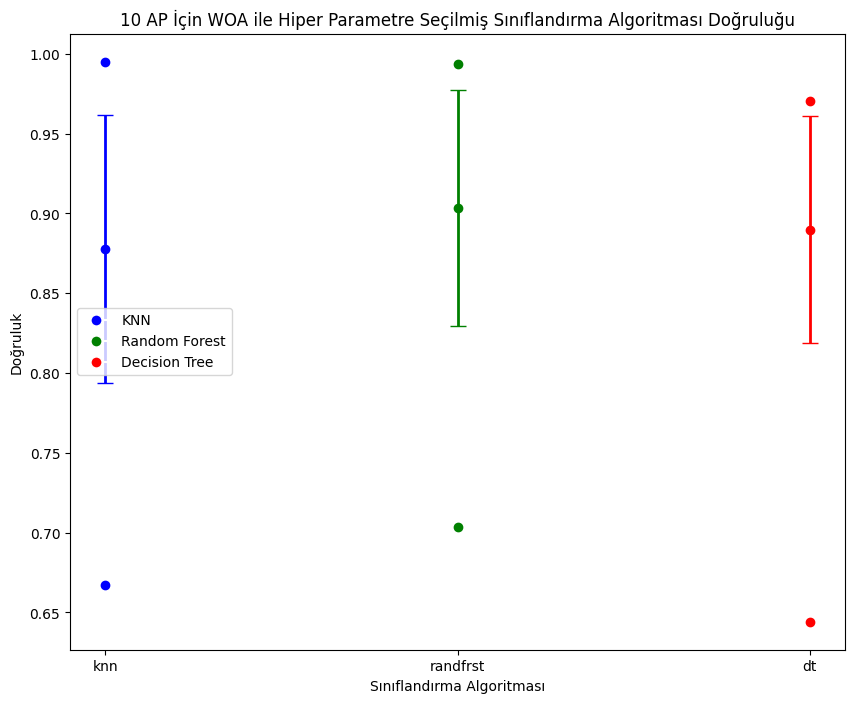

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar('knn', knn_accuracy_mean_woa, knn_accuracy_std_woa, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_accuracy_max_woa, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_accuracy_min_woa, fmt='o', linewidth=2, capsize=6, color="blue")

ax.errorbar('randfrst', randfrst_accuracy_mean_woa, randfrst_accuracy_std_woa, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_accuracy_max_woa, fmt='o', linewidth=2, capsize=6, color='green')
ax.errorbar('randfrst', randfrst_accuracy_min_woa, fmt='o', linewidth=2, capsize=6, color='green')

ax.errorbar('dt', dt_accuracy_mean_woa, dt_accuracy_std_woa, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_accuracy_max_woa, fmt='o', linewidth=2, capsize=6, color='red')
ax.errorbar('dt', dt_accuracy_min_woa, fmt='o', linewidth=2, capsize=6, color='red')

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Doğruluk')
ax.set_title('10 AP İçin WOA ile Hiper Parametre Seçilmiş Sınıflandırma Algoritması Doğruluğu')

knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

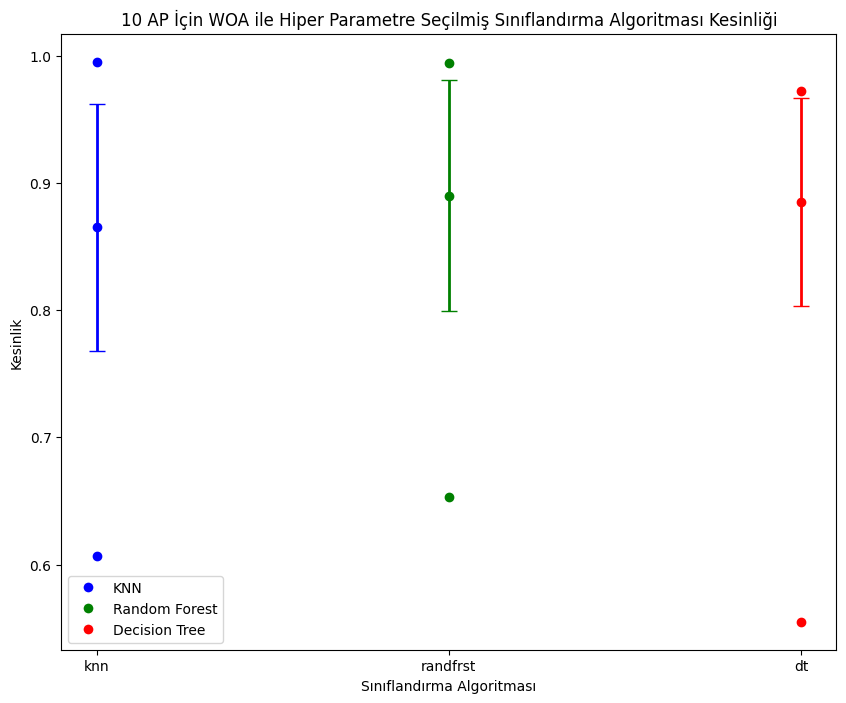

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar('knn', knn_precision_mean_woa, knn_precision_std_woa, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_precision_max_woa, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_precision_min_woa, fmt='o', linewidth=2, capsize=6, color="blue")

ax.errorbar('randfrst', randfrst_precision_mean_woa, randfrst_precision_std_woa, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_precision_max_woa, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_precision_min_woa, fmt='o', linewidth=2, capsize=6, color="green")


ax.errorbar('dt', dt_precision_mean_woa, dt_precision_std_woa, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_precision_max_woa, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_precision_min_woa, fmt='o', linewidth=2, capsize=6, color="red")

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Kesinlik')
ax.set_title('10 AP İçin WOA ile Hiper Parametre Seçilmiş Sınıflandırma Algoritması Kesinliği')
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

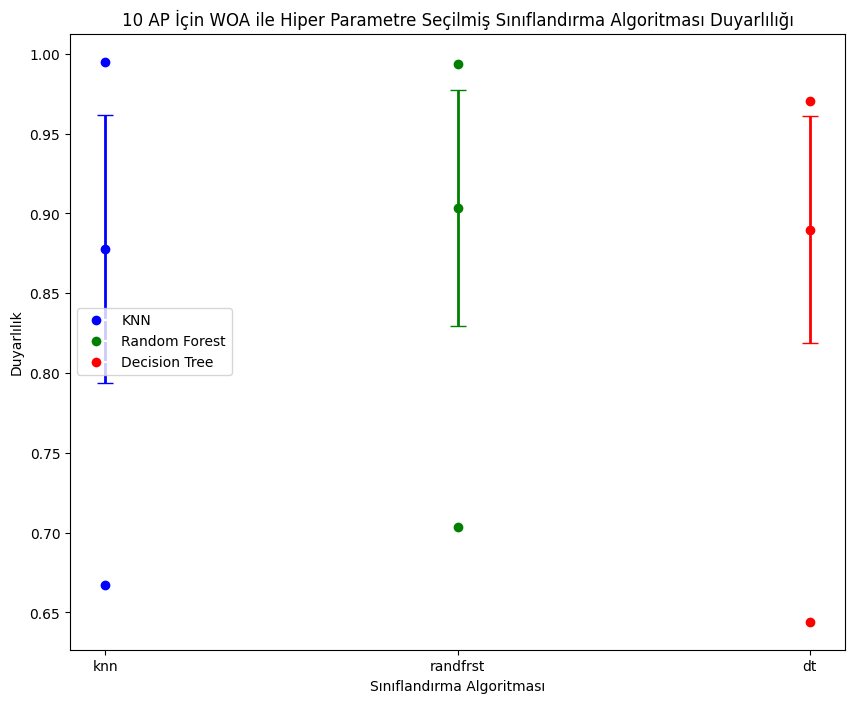

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar('knn', knn_recall_mean_woa, knn_recall_std_woa, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_recall_max_woa, fmt='o', linewidth=2, capsize=6, color="blue")
ax.errorbar('knn', knn_recall_min_woa, fmt='o', linewidth=2, capsize=6, color="blue")

ax.errorbar('randfrst', randfrst_recall_mean_woa, randfrst_recall_std_woa, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_recall_max_woa, fmt='o', linewidth=2, capsize=6, color="green")
ax.errorbar('randfrst', randfrst_recall_min_woa, fmt='o', linewidth=2, capsize=6, color="green")

ax.errorbar('dt', dt_recall_mean_woa, dt_recall_std_woa, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_recall_max_woa, fmt='o', linewidth=2, capsize=6, color="red")
ax.errorbar('dt', dt_recall_min_woa, fmt='o', linewidth=2, capsize=6, color="red")

ax.set_xlabel('Sınıflandırma Algoritması')
ax.set_ylabel('Duyarlılık')
ax.set_title('10 AP İçin WOA ile Hiper Parametre Seçilmiş Sınıflandırma Algoritması Duyarlılığı')
# Custom legend labels and colors
knn_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
rf_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
dt_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# Create the legend
ax.legend([knn_patch, rf_patch, dt_patch], ['KNN', 'Random Forest', 'Decision Tree'])

plt.show()